In [1]:
# train_model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib
import numpy as np

In [2]:
import pandas as pd
#Load dataset (update filename/location if needed)
df = pd.read_csv("Grocery_Inventory_and_Sales.csv")

In [3]:
#columns data
print(df.columns)

Index(['Product_Name', 'Category', 'Stock_Quantity', 'Reorder_Level',
       'Reorder_Quantity', 'Unit_Price', 'Sales_Volume',
       'Inventory_Turnover_Rate', 'Status'],
      dtype='object')


In [4]:
#  Basic cleaning: remove currency/symbols and convert numeric-like cols
for col in df.columns:
    df[col] = df[col].astype(str).str.replace('[^0-9.-]', '', regex=True)

In [5]:
# convert to numeric where possible
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except Exception:
        pass

In [6]:
#Label-encode remaining categorical columns (if any)
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

In [7]:
# Save encoders (optional)
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [8]:
#  Features and target
# Change "Status" below if  target column has a different name
target = "Status"
X = df.drop([target, "Product_Name"], axis=1)
y = df[target].astype(int)


In [9]:
# Shuffle & split
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Training the model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [11]:
# Evaluate
acc = model.score(X_test, y_test)
print("Test accuracy:", acc)

Test accuracy: 1.0


In [12]:
 # Save model as grocery_model.pkl inside
joblib.dump(model, "grocery_model.pkl")
print("Saved model to grocery_model.pkl")


Saved model to grocery_model.pkl


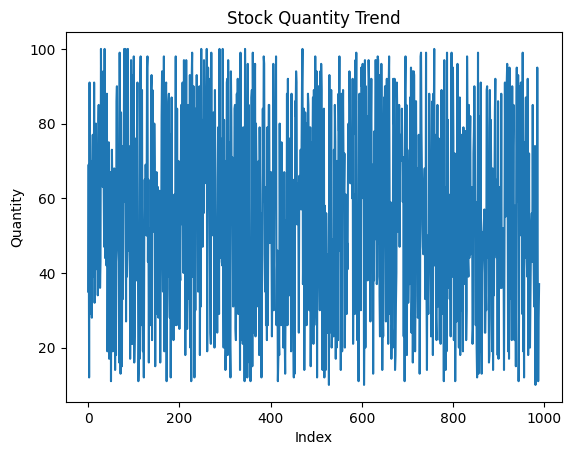

In [13]:
import matplotlib.pyplot as plt

plt.plot(df['Stock_Quantity'])
plt.title("Stock Quantity Trend")
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.show()